In [91]:
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from error_metrics import *
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the data
data = pd.read_csv('mushroom.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Data Cleaning and Exploration

In [92]:
#Get the data type for all columns: They are all strings
for i in list(data.columns):
    print(i,"is",str(type(data[i][0])))

class is <class 'str'>
cap-shape is <class 'str'>
cap-surface is <class 'str'>
cap-color is <class 'str'>
bruises is <class 'str'>
odor is <class 'str'>
gill-attachment is <class 'str'>
gill-spacing is <class 'str'>
gill-size is <class 'str'>
gill-color is <class 'str'>
stalk-shape is <class 'str'>
stalk-root is <class 'str'>
stalk-surface-above-ring is <class 'str'>
stalk-surface-below-ring is <class 'str'>
stalk-color-above-ring is <class 'str'>
stalk-color-below-ring is <class 'str'>
veil-type is <class 'str'>
veil-color is <class 'str'>
ring-number is <class 'str'>
ring-type is <class 'str'>
spore-print-color is <class 'str'>
population is <class 'str'>
habitat is <class 'str'>


In [93]:
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].unique()))
#stalk-root has a ?
#veil-type only has one value 

class contains the values: 
 ['p' 'e']
cap-shape contains the values: 
 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface contains the values: 
 ['s' 'y' 'f' 'g']
cap-color contains the values: 
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises contains the values: 
 ['t' 'f']
odor contains the values: 
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment contains the values: 
 ['f' 'a']
gill-spacing contains the values: 
 ['c' 'w']
gill-size contains the values: 
 ['n' 'b']
gill-color contains the values: 
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape contains the values: 
 ['e' 't']
stalk-root contains the values: 
 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring contains the values: 
 ['s' 'f' 'k' 'y']
stalk-surface-below-ring contains the values: 
 ['s' 'f' 'y' 'k']
stalk-color-above-ring contains the values: 
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring contains the values: 
 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type contains the values: 
 ['p']
veil-

In [94]:
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].value_counts()))
#cap-shape - 4 c
#cap-surface - 4 g
#stalk-color-above-ring - 4 y 
#Veil-color - 8 yellow
# Veil-type - only p
# stalk-root - 2480 ?

class contains the values: 
 e    4208
p    3916
Name: class, dtype: int64
cap-shape contains the values: 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
cap-surface contains the values: 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
cap-color contains the values: 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
bruises contains the values: 
 f    4748
t    3376
Name: bruises, dtype: int64
odor contains the values: 
 n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
gill-attachment contains the values: 
 f    7914
a     210
Name: gill-attachment, dtype: int64
gill-spacing contains the values: 
 c    6812
w    1312
Name: gill-spacing, dtype: int64
gill-size contains the values: 
 b    5612
n    2512
Name: gill-size, dtype: int64
gill-color contains the values: 
 b    1728

In [95]:
#Checking how class compares to these values
#Drop these rows 
print(data[['class','cap-shape']].loc[data['cap-shape'] == 'c'])
print(data[['class','cap-surface']].loc[data['cap-surface'] == 'g'])
print(data[['class','stalk-color-above-ring']].loc[data['stalk-color-above-ring'] == 'y'])
print(data[['class','veil-color']].loc[data['veil-color'] == 'y'])
#Replace ? in stalk-root with u for unknown
#Drop the column veil-type

     class cap-shape
5126     p         c
5508     p         c
7401     p         c
7706     p         c
     class cap-surface
5107     p           g
5126     p           g
5128     p           g
5717     p           g
     class stalk-color-above-ring
6912     p                      y
7295     p                      y
7367     p                      y
7401     p                      y
7483     p                      y
7600     p                      y
7706     p                      y
7739     p                      y
     class veil-color
6912     p          y
7295     p          y
7367     p          y
7401     p          y
7483     p          y
7600     p          y
7706     p          y
7739     p          y


In [96]:
#Cleaning the Data
#Number of rows before
print("Before cleaning. Rows =",str(len(data)))

#Drop the values in the previously stated columns
data = data[data['cap-shape'] != 'c']
data = data[data['cap-surface'] != 'g']
data = data[data['stalk-color-above-ring'] != 'y']
data = data[data['veil-color'] != 'y']

#Number of rows
print("After cleaning. Rows =",str(len(data)))

#Drop veil-type
data = data.drop('veil-type',axis=1)


#Drop stalk-root
##data = data.drop('stalk-root',axis=1)

#Replace ? with u in stalk-root
data = data.replace(to_replace ="?", value ="u") 

Before cleaning. Rows = 8124
After cleaning. Rows = 8111


In [97]:
#Check if the data has been fixed 
for i in list(data.columns):
    print(i,"contains the values: \n",str(data[i].unique()))

class contains the values: 
 ['p' 'e']
cap-shape contains the values: 
 ['x' 'b' 's' 'f' 'k']
cap-surface contains the values: 
 ['s' 'y' 'f']
cap-color contains the values: 
 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises contains the values: 
 ['t' 'f']
odor contains the values: 
 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment contains the values: 
 ['f' 'a']
gill-spacing contains the values: 
 ['c' 'w']
gill-size contains the values: 
 ['n' 'b']
gill-color contains the values: 
 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape contains the values: 
 ['e' 't']
stalk-root contains the values: 
 ['e' 'c' 'b' 'r' 'u']
stalk-surface-above-ring contains the values: 
 ['s' 'f' 'k' 'y']
stalk-surface-below-ring contains the values: 
 ['s' 'f' 'y' 'k']
stalk-color-above-ring contains the values: 
 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c']
stalk-color-below-ring contains the values: 
 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color contains the values: 
 ['w' 'n' 'o']
ring-num

# Data Exploration

In [66]:
#Get the distribution of etable/poisonous per variable
for i in list(data.columns):
    if i == 'class':
        print('This is the target')
    else:
        print(data.groupby(['class',i])[i].count().unstack(fill_value=0))
        print('\n')

This is the target
cap-shape    b     f    k   s     x
class                              
e          404  1596  228  32  1948
p           45  1553  597   0  1708


cap-surface     f     s     y
class                        
e            1560  1144  1504
p             760  1412  1731


cap-color    b   c    e     g     n   p   r   u    w    y
class                                                    
e           48  32  624  1032  1264  56  16  16  720  400
p          120  12  876   808  1020  88   0   0  315  664


bruises     f     t
class              
e        1456  2752
p        3284   619


odor     a    c     f    l   m     n    p    s    y
class                                              
e      400    0     0  400   0  3408    0    0    0
p        0  192  2160    0  36   107  256  576  576


gill-attachment    a     f
class                     
e                192  4016
p                 18  3885


gill-spacing     c     w
class                   
e             3008  1200
p 

In [67]:
#Can I calculate the chances of a mushroom being eatable based on a single variable?
for i in list(data.columns):
    if i == 'class':
        print('Here are the odds of a mushroom being eatable by variable')
    else:
        test = data.groupby(['class',i])[i].count().unstack(fill_value=0)
        print(i)
        for i in list(test.columns):
            print('A mushroom with',i,'has a',str(round((test[i][0]/(test[i][0]+test[i][1]))*100,2)),'% chance of being eatable')
        print('\n')

Here are the odds of a mushroom being eatable by variable
cap-shape
A mushroom with b has a 89.98 % chance of being eatable
A mushroom with f has a 50.68 % chance of being eatable
A mushroom with k has a 27.64 % chance of being eatable
A mushroom with s has a 100.0 % chance of being eatable
A mushroom with x has a 53.28 % chance of being eatable


cap-surface
A mushroom with f has a 67.24 % chance of being eatable
A mushroom with s has a 44.76 % chance of being eatable
A mushroom with y has a 46.49 % chance of being eatable


cap-color
A mushroom with b has a 28.57 % chance of being eatable
A mushroom with c has a 72.73 % chance of being eatable
A mushroom with e has a 41.6 % chance of being eatable
A mushroom with g has a 56.09 % chance of being eatable
A mushroom with n has a 55.34 % chance of being eatable
A mushroom with p has a 38.89 % chance of being eatable
A mushroom with r has a 100.0 % chance of being eatable
A mushroom with u has a 100.0 % chance of being eatable
A mushroom 

In [68]:
#Create 3 dictionaries 
    #1 that has poisonous traits, 
    #1 that has eatable traits, 
    #1 that has 'you feeling lucky?' traits
poison = {}
eatable = {}
idkTryIt = {}
for col in list(data.columns):
    if col == 'class':
        print('Here are the odds of a mushroom being eatable by variable')
    else:
        test = data.groupby(['class',col])[col].count().unstack(fill_value=0)
        for ver in list(test.columns):
            if (test[ver][0]/(test[ver][0]+test[ver][1])) == 1:
                eatable[col] = ver
            elif (test[ver][0]/(test[ver][0]+test[ver][1])) == 0:
                poison[col] = ver
            else:
                idkTryIt[col+'-'+ver] = round((test[ver][0]/(test[ver][0]+test[ver][1])),4)

Here are the odds of a mushroom being eatable by variable


In [69]:
print(str(len(poison)),'variables indicate 100% poisonous')
print(str(len(eatable)),'variables indicate 100% eatable')
print(str(len(idkTryIt)),"variables don't indicate anything for certain")

7 variables indicate 100% poisonous
13 variables indicate 100% eatable
70 variables don't indicate anything for certain


In [70]:
print(poison)
print()
print(eatable)

{'odor': 'y', 'gill-color': 'r', 'stalk-color-above-ring': 'c', 'stalk-color-below-ring': 'y', 'ring-number': 'n', 'ring-type': 'n', 'spore-print-color': 'r'}

{'cap-shape': 's', 'cap-color': 'u', 'odor': 'l', 'gill-color': 'o', 'stalk-root': 'r', 'stalk-surface-above-ring': 'y', 'stalk-color-above-ring': 'o', 'stalk-color-below-ring': 'o', 'veil-color': 'o', 'ring-type': 'f', 'spore-print-color': 'y', 'population': 'n', 'habitat': 'w'}


Some things to note:

-Based on the data you can classify a mushroom as poisonous/eatable with almost 100% accuracy based on smell alone

-stalk-color-above-ring: 5/8 of the variables can be used to classify a mushroom with 100% certainty

-stalk-color-below-ring: 5/8 of the variables can be used to classify a mushroom with 100% certainty

-veil-color: 2/3 of the variables can be used to classify a mushroom with 100% certainty

# Preping the data for Random Forest

In [103]:
#Removing the target variable
features = list(data)
features.remove('class')
data_x = data[features]
data_y = data['class']

#Convert Class to 1 and 0 and OneHotEncode other columns to 1 and 0
data_y.replace({'e':0,'p':1}, inplace=True)
data_x = pd.get_dummies(data_x) #It works WITHOUT onehotencoding variables!!!

In [104]:
#for i in list(data_x.columns):
#    print(i)
len(list(data_x.columns))

112

## Random Forest code from notes

In [105]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

In [106]:
# Buils a sequence of Random Forest models for different n_est and depth values
n_ests = [5, 10, 20, 50, 100, 112] #Number of estimators meaning the number of 'trees' being considores for the model
depths = [2, 4, 6, 8, 20] #How deep are the trees meaning how many variables are considered in building a single tree
#Create a dataframe containing n_ests, depth, and accuracy so it can be plotted
ne = []
dep = []
acc = []
for n in n_ests:
    for dp in depths:
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        print('------ Evaluating model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        print_binary_classif_error_report(y_test, y_hat)
        ne.append(n)
        dep.append(dp)
        acc.append(accuracy_score(y_test, y_hat))

#The F1 score can be interpreted as a weighted average of the precision and recall, 

------ Evaluating model: n_estimators =5, max_depth = 2 ------
Accuracy: 0.9013968775677896
Precision: 0.9826707441386341
Recall: 0.8121314237573716
F1: 0.88929889298893
ROC AUC: 0.8992493526164564
Confusion Matrix: 
[[1230   17]
 [ 223  964]]
------ Evaluating model: n_estimators =5, max_depth = 4 ------
Accuracy: 0.9860312243221035
Precision: 0.9914748508098892
Recall: 0.9797809604043808
F1: 0.985593220338983
ROC AUC: 0.9858808571067614
Confusion Matrix: 
[[1237   10]
 [  24 1163]]
------ Evaluating model: n_estimators =5, max_depth = 6 ------
Accuracy: 0.9884963023829088
Precision: 1.0
Recall: 0.9764111204717776
F1: 0.9880647911338448
ROC AUC: 0.9882055602358888
Confusion Matrix: 
[[1247    0]
 [  28 1159]]
------ Evaluating model: n_estimators =5, max_depth = 8 ------
Accuracy: 0.9995891536565324
Precision: 1.0
Recall: 0.9991575400168492
F1: 0.9995785924989464
ROC AUC: 0.9995787700084247
Confusion Matrix: 
[[1247    0]
 [   1 1186]]
------ Evaluating model: n_estimators =5, max_dep

In [107]:
#Can I make a plot of the accuracy vs n_estimators and max_depth
#Create a dataframe
accMeasure = {'n_ests':ne,'depths':dep,"accuracy":acc}
accMeasure = pd.DataFrame(accMeasure)
accMeasure.sort_values(by=['accuracy'], ascending=False)

,n_ests,depths,accuracy
29,112,20,1.000000
9,10,20,1.000000
24,100,20,1.000000
23,100,8,1.000000
19,50,20,1.000000
18,50,8,1.000000
28,112,8,1.000000
13,20,8,1.000000
14,20,20,1.000000
8,10,8,1.000000


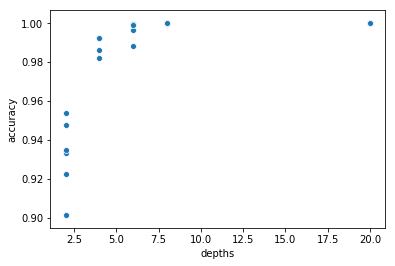

In [108]:
#Plotting results
sns.scatterplot(x="depths", y="accuracy", data=accMeasure) #blue

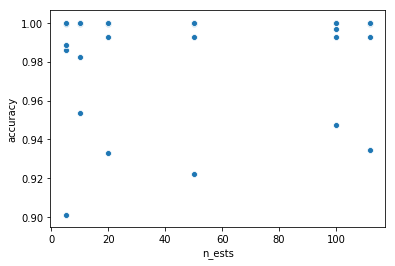

In [109]:
#Plotting results
sns.scatterplot(x="n_ests", y="accuracy", data=accMeasure) #orange

#Indicates we should do some variable selection methods 
#The variation likely indicates overfitting and can be caused by how the data is split

# Variable selection

In [110]:
data_vs = data.drop('odor',axis=1)

#Removing the target variable
features = list(data_vs)
features.remove('class')
data_x = data_vs[features]
data_y = data_vs['class']

##Convert Class to 1 and 0 and OneHotEncode other columns to 1 and 0
#data_y.replace({'e':0,'p':1}, inplace=True)
data_x = pd.get_dummies(data_x)

In [111]:
len(list(data_x.columns))

103

In [112]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.3, random_state = 4)

In [113]:
# Buils a sequence of Random Forest models for different n_est and depth values
n_ests = [5, 10, 50, 100] #Number of estimators meaning the number of 'trees' being considores for the model
depths = [2, 4, 6, 8, 20] #How deep are the trees meaning how many variables are considered in building a single tree
#Create a dataframe containing n_ests, depth, and accuracy so it can be plotted
ne = []
dep = []
acc = []
for n in n_ests:
    for dp in depths:
        mod = ensemble.RandomForestClassifier(n_estimators = n, max_depth = dp)
        mod.fit(x_train, y_train)
        y_hat = mod.predict(x_test)
        print('------ Evaluating model: n_estimators =' + str(n) + ', max_depth = ' + str(dp),'------')
        print_binary_classif_error_report(y_test, y_hat)
        ne.append(n)
        dep.append(dp)
        acc.append(accuracy_score(y_test, y_hat))

#The F1 score can be interpreted as a weighted average of the precision and recall, 

------ Evaluating model: n_estimators =5, max_depth = 2 ------
Accuracy: 0.8808545603944125
Precision: 0.9444995044598612
Recall: 0.8028643639427128
F1: 0.8679417122040073
ROC AUC: 0.8789782926369538
Confusion Matrix: 
[[1191   56]
 [ 234  953]]
------ Evaluating model: n_estimators =5, max_depth = 4 ------
Accuracy: 0.928923582580115
Precision: 0.9837786259541985
Recall: 0.8685762426284751
F1: 0.9225950782997763
ROC AUC: 0.9274717620520082
Confusion Matrix: 
[[1230   17]
 [ 156 1031]]
------ Evaluating model: n_estimators =5, max_depth = 6 ------
Accuracy: 0.9884963023829088
Precision: 0.998280309544282
Recall: 0.9780960404380792
F1: 0.9880851063829788
ROC AUC: 0.9882460955999538
Confusion Matrix: 
[[1245    2]
 [  26 1161]]
------ Evaluating model: n_estimators =5, max_depth = 8 ------
Accuracy: 0.9942481511914544
Precision: 0.9949367088607595
Recall: 0.9932603201347936
F1: 0.9940978077571669
ROC AUC: 0.9942243862101394
Confusion Matrix: 
[[1241    6]
 [   8 1179]]
------ Evaluating 

In [114]:
#Can I make a plot of the accuracy vs n_estimators and max_depth
#Create a dataframe
accMeasure = {'n_ests':ne,'depths':dep,"accuracy":acc}
accMeasure = pd.DataFrame(accMeasure)
accMeasure.sort_values(by=['accuracy'], ascending=False)

,n_ests,depths,accuracy
19,100,20,1.000000
8,10,8,1.000000
14,50,20,1.000000
13,50,8,1.000000
18,100,8,1.000000
9,10,20,1.000000
4,5,20,1.000000
17,100,6,1.000000
12,50,6,0.998357
3,5,8,0.994248


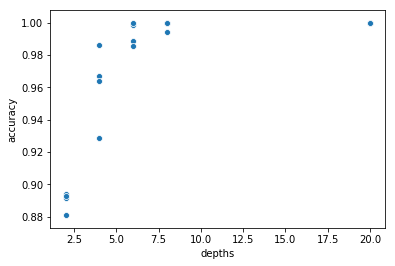

In [115]:
#Plotting results
sns.scatterplot(x="depths", y="accuracy", data=accMeasure) #blue

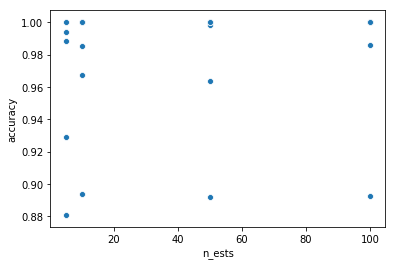

In [116]:
#Plotting results
sns.scatterplot(x="n_ests", y="accuracy", data=accMeasure) #orange

## Another Example

https://towardsdatascience.com/random-forest-classification-and-its-implementation-d5d840dbead0

sklearn.decisiontreeclassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
#Predicting the test set results and making the Confusion matrix
y_pred = model.predict(x_test)

#Making the confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1268,    0],
       [   0, 1170]])

In [34]:
#Getting the score for the model
model.score(x_test,y_test)

1.0

# Visualize Decision Tree

In [128]:
from sklearn.datasets import load_iris
from sklearn import tree
import sklearn
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [135]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [137]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [138]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)